# Performance of different statistical models

In [2]:
from IPython.display import Image

To describe and predict circuity factors, we analyze both regression as well as classification models. Often, for network planning, practitioners will be interested in the actual value of circuity factor. However, if policy makers at the local government want to understand and influence the circuity factors and in practice it is impossible to develop urban planning initiatives for each individual pixel. A more natural way for practitioners to digest the large amount of pixels is to think of them in clusters of pixels with similar characteristics and the government will set-up different urban planning strategies for each cluster of pixels.

### Implemented models

For building the models, we follow some general rules
1. Data is split in a training (2/3) and testing (1/3) set
2. Cross validation on the training data drives the decision of the optimal parameters

We implemented the following numerical prediction models
- Linear regression
- Ridge and lasso regression (tuning parameter is alpha)
- Random forests (tuning parameters are number of trees and tree depth)

Furthermore, we implemented functions for forward and backward stepwise subset selection. 

For classification, we implemented the following models
- Logistics regression (tuning parameter is C)
- Random forests (tuning parameters are number of trees and tree depth)

Naturally, these models can be fed with different predictors, including polynomial combinations of the predictors. In this analysis, we only included polynomial terms with degree 2. In the results table, we refer to this as Polynomial Regression, i.e. 'Polynomial Logistic Regression - 2' means logistic regression with polynomial combinations of predictors of degree 2.

### Results 

The results for numerical prediction and classification are presented in two tables per city. For the numerical prediction, the train and test scores refer to the $R^2$ values and in the case of classification the results refer to accuracy. 

#### San Francisco - Numerical Prediction

Based on the results, we can derive the following conclusions
* The different regression models have similar test results, but including polynomial terms increases the training score.
* Interestingly enough, for the linear regression models without polynomial terms, the $R^2$ is higher for the test set than for the training set.
* The random forest achieves high accuracy on the testing set, but performs worse than the other models on the test data.

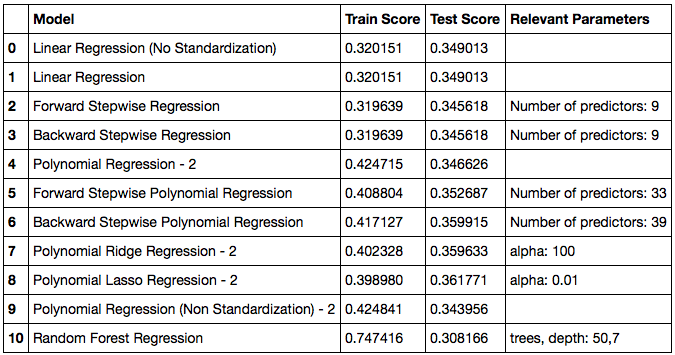

In [9]:
Image(filename='SF_regression.png')

#### San Francisco - Classification

Based on the results, we can derive the following conclusions
* The classification accuracy is higher for logistic regression with polynomial terms than without those terms, both for the train and test data. However, the difference for the test score is negligible. 
* Again, the random forest clearly outperforms the other models when we analyze the score on the train data. However, there is no difference for the test data. 

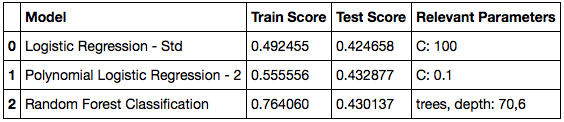

In [10]:
Image(filename='SF_classification.png')

#### Sao Paulo - Numerical Prediction

Based on the results, we can derive the following conclusions
* Regression with polynomial terms appears to lead to overfitfed models. The results for the train set are higher than for linear regression without polynomial terms, but the test scores are clearly lower.
* For linear regression without polynomial terms, the train and test scores are very similar and reasonably high.
* Similar to what we have seen in San Francisco, the random forest achieves high accuracy on the testing set, but performs worse than the other models on the test data.

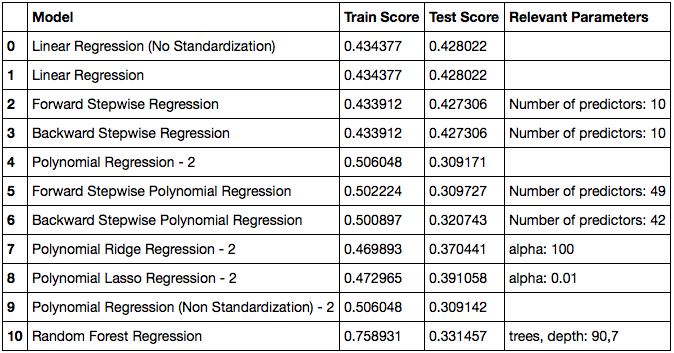

In [11]:
Image(filename='SP_regression.png')

#### Sao Paulo - Classification

Based on the results, we can derive the following conclusions
* Similar to the results for San Francisco, polynomial logistic regression outperforms the logistic regression model without polynomial terms on the training test. The difference in score on the test set remains negligible. 
* The random forest does not outperform logistic regression in the case of Sao Paulo. 

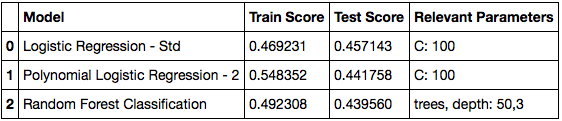

In [7]:
Image(filename='SP_classification.png')

### Conclusions

The models tested in this project provide reasonably good results. If we look to understand the impact of the different predictors on circuity factor, the best choice would be to go with random forest models. The scores on the training set are consistently high and the results give us valuable insights about the relative importance of each predictor (this is discussed on the main page). If we look at predicting circuity factors, there is potential to improve the scores. 

Potential ways to improve the prediction are to include additional variables or by changing the pixel size. Additional factors to include could be factors associated to public land use instead of purely infrastructural factors. Examples are the presence of a park, university, train station or large sports facility as a stadium. Changing the pixel size might influence the results because we get a higher accuracy on the infrastructural components in a pixel. Currently, if a highway is passing trough a pixel at the eastern boundary, it is not affecting many trips. In other words, only trips that start or end in the eastern part of the pixel have a high circuity, while trips that start and end in the western or central part of the pixel could have low circuity. On average, the circuity factor will be medium while the highway distance and capacity predictors have high values. 